In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
state = 'PA'
type_analysis = "deaths" # "cases" or "deaths"

# Open all models

### Predictions

In [87]:
predictions = {}
for model in ['sir_0', 'sir_100', 'regression_0', 'regression_100', 'bayes_sir', 'ihme']:
    predictions[model] = {pd.to_datetime(f[3:11]): pd.read_csv(os.path.join('results/', model,f), parse_dates = True, index_col = 'date') for f in  os.listdir(os.path.join('results/', model)) if state in f}
    predictions[model] = pd.DataFrame({d: predictions[model][d]['pred_{}'.format(type_analysis)] for d in sorted(predictions[model]) if 'pred_{}'.format(type_analysis) in predictions[model][d].columns})
    if predictions[model].empty:
        del predictions[model]
print("Opened: {}".format(', '.join(predictions.keys())))

Opened: sir_0, sir_100, regression_0, regression_100, ihme


In [88]:
ground_truth = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv', parse_dates=['date'])[['date', 'state', 'positive', 'death']]
ground_truth = ground_truth[ground_truth.state == state]
ground_truth.index = ground_truth.date

if type_analysis == "cases":
    ground_truth = ground_truth.sort_index()['positive']
elif type_analysis == "deaths":
    ground_truth = ground_truth.sort_index()['death']
ground_truth

date
2020-03-06      NaN
2020-03-07      NaN
2020-03-08      NaN
2020-03-09      NaN
2020-03-10      NaN
2020-03-11      NaN
2020-03-12      NaN
2020-03-13      NaN
2020-03-14      NaN
2020-03-15      NaN
2020-03-16      NaN
2020-03-17      NaN
2020-03-18      1.0
2020-03-19      1.0
2020-03-20      1.0
2020-03-21      2.0
2020-03-22      2.0
2020-03-23      6.0
2020-03-24      7.0
2020-03-25     11.0
2020-03-26     16.0
2020-03-27     22.0
2020-03-28     34.0
2020-03-29     38.0
2020-03-30     49.0
2020-03-31     63.0
2020-04-01     74.0
2020-04-02     90.0
2020-04-03    102.0
2020-04-04    136.0
2020-04-05    150.0
2020-04-06    162.0
2020-04-07    240.0
2020-04-08    309.0
2020-04-09    338.0
2020-04-10    416.0
2020-04-11    494.0
2020-04-12    507.0
Name: death, dtype: float64

Columns are the date used for training, index are the date at which it is evaluated

In [89]:
predictions['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
date,,,,,,,,,,,,,,
2020-03-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-07,0.349087,0.434457,0.604436,0.635712,0.482209,0.504689,0.442309,0.419627,0.452627,0.464975,0.483647,0.503388,0.493647,0.516998
2020-03-08,1.155563,1.438702,2.010151,2.113951,1.591964,1.667750,1.458209,1.381733,1.491973,1.533426,1.594429,1.658113,1.622559,1.698670
2020-03-09,2.561288,3.190154,4.477922,4.708635,3.518336,3.689593,3.217895,3.045097,3.291807,3.385060,3.518353,3.655558,3.568934,3.734825
2020-03-10,4.752054,5.921354,8.353092,8.782422,6.507244,6.831497,5.941981,5.614905,6.077278,6.253006,6.496505,6.743250,6.567157,6.869407
2020-03-11,7.971137,9.937011,14.092765,14.815217,10.878458,11.434016,9.916375,9.356268,10.140059,10.439642,10.841300,11.241278,10.918692,11.415875
2020-03-12,12.537006,15.636249,22.301575,23.441668,17.047647,17.940872,15.511508,14.611649,15.857902,16.337058,16.957484,17.563460,17.011207,17.776941
2020-03-13,18.866411,23.541608,33.778594,35.500320,25.554898,26.929946,23.207163,21.823308,23.719891,24.453504,25.369247,26.244631,25.343090,26.469846
2020-03-14,27.504479,34.336772,49.578631,52.097856,37.101558,39.153395,33.624484,31.562177,34.358982,35.447515,36.755191,37.975757,36.554854,38.158715


### Remove training data

In [90]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model].loc[predictions[model].index <= c, c] = np.nan
    predictions[model] = predictions[model].dropna(how='all')

In [91]:
predictions['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
date,,,,,,,,,,,,,,
2020-03-29,2173.828026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,2792.559354,3402.056497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,3564.575445,4305.603109,6259.283686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,4516.439468,5400.106674,7681.620147,8072.327388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,5674.012798,6704.738342,9302.725713,9780.444338,6695.072634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,7060.144918,8233.025391,11114.839396,11691.389659,8245.775096,8887.886446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,8692.192210,9991.103755,13103.751363,13790.423023,10048.900347,10812.770069,9246.175905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,10579.865117,11976.881657,15250.729450,16057.912080,12109.797488,13003.140187,11262.762850,10547.901955,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,12723.931669,14180.347355,17534.708305,18471.643196,14425.076290,15452.546076,13572.519130,12803.384300,13976.451661,NaN,NaN,NaN,NaN,NaN


### Compute difference

In [92]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model][c] -= ground_truth[predictions[model].index]
        predictions[model][c] = predictions[model][c].abs()

/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
predictions['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
date,,,,,,,,,,,,,,
2020-03-29,2135.828026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,2743.559354,3353.056497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,3501.575445,4242.603109,6196.283686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,4442.439468,5326.106674,7607.620147,7998.327388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,5584.012798,6614.738342,9212.725713,9690.444338,6605.072634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,6958.144918,8131.025391,11012.839396,11589.389659,8143.775096,8785.886446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,8556.192210,9855.103755,12967.751363,13654.423023,9912.900347,10676.770069,9110.175905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,10429.865117,11826.881657,15100.729450,15907.912080,11959.797488,12853.140187,11112.762850,10397.901955,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,12561.931669,14018.347355,17372.708305,18309.643196,14263.076290,15290.546076,13410.519130,12641.384300,13814.451661,NaN,NaN,NaN,NaN,NaN


### Relative dataframe

Computing with regard to the start date

In [94]:
predictions_relative = {}
for model in predictions:
    predictions_relative[model] = predictions[model].copy()
    for c in predictions[model].columns:
        predictions_relative[model][c] = predictions_relative[model][c].shift(-predictions_relative[model][c].isnull().sum())
    predictions_relative[model].index = np.arange(len(predictions_relative[model]))

In [95]:
predictions_relative['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
0,2135.828026,3353.056497,6196.283686,7998.327388,6605.072634,8785.886446,9110.175905,10397.901955,13814.451661,16986.173355,20712.658357,24936.848863,27484.046379,33084.881252
1,2743.559354,4242.603109,7607.620147,9690.444338,8143.775096,10676.770069,11112.762850,12641.384300,16449.751834,19979.705364,24181.445406,28843.418994,31735.671902,37946.436081
2,3501.575445,5326.106674,9212.725713,11589.389659,9912.900347,12853.140187,13410.519130,15138.550651,19396.757245,23288.600403,27870.834923,33022.851449,36348.361150,NaN
3,4442.439468,6614.738342,11012.839396,13654.423023,11959.797488,15290.546076,15934.004052,17961.969067,22668.013259,26797.218985,31798.624692,37505.537432,NaN,NaN
4,5584.012798,8131.025391,12967.751363,15907.912080,14263.076290,17906.268894,18747.364784,21130.278093,26149.308021,30524.584568,35997.236549,NaN,NaN,NaN
5,6958.144918,9855.103755,15100.729450,18309.643196,16743.070614,20754.179775,21862.709907,24533.707186,29860.307441,34504.871770,NaN,NaN,NaN,NaN
6,8556.192210,11826.881657,17372.708305,20768.939373,19456.326918,23840.113285,25166.300915,28194.413153,33835.126812,NaN,NaN,NaN,NaN,NaN
7,10429.865117,14018.347355,19694.276016,23339.275206,22410.736186,27048.250025,28679.062181,32147.117405,NaN,NaN,NaN,NaN,NaN,NaN
8,12561.931669,16344.929850,22120.174675,26032.293999,25491.831640,30401.124234,32436.940122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14876.129595,18860.540894,24663.234367,28742.289392,28722.843511,33939.064572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prediction in x days

What is the error if the model tries to predict in x days ?

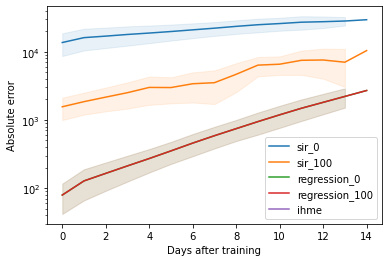

In [96]:
for model in predictions_relative:
    std = predictions_relative[model].std(axis = 1)
    mean = predictions_relative[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions_relative[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Days after training")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for x days 

What is the average error for the following x days ?

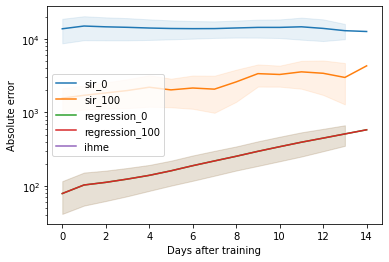

In [97]:
for model in predictions_relative:
    mean_matrix = predictions_relative[model].rolling(len(predictions_relative[model]), min_periods=1).mean()
    mean_matrix[predictions_relative[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Days after training")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for given date

What is the predictions that my model does for a given date ? Large variance indicates that the model changed 

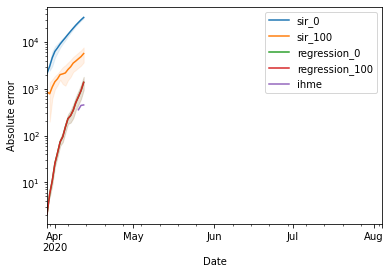

In [98]:
for model in predictions:
    std = predictions[model].std(axis = 1)
    mean = predictions[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
    
plt.xlabel("Date")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction until given date

What is the average error until a given date ?

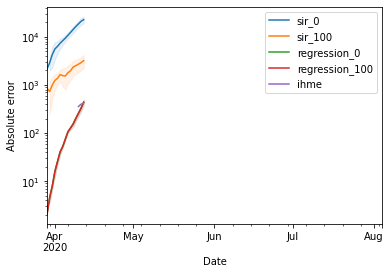

In [99]:
for model in predictions:
    mean_matrix = predictions[model].rolling(len(predictions[model]), min_periods=1).mean()
    mean_matrix[predictions[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Date")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Parameters

In [100]:
params = {}
for model in ['bayes_sir', 'sir_0', 'sir_100']:
    print(model)
    params[model] = {pd.to_datetime(f[8:-4]): pd.read_csv(os.path.join('params/', model,f), index_col = 'Parameter')['Value'] for f in os.listdir(os.path.join('params/', model)) if state in f}
    params[model] = pd.DataFrame({d: params[model][d] for d in sorted(params[model])}).T

bayes_sir
sir_0
sir_100


### Gamma

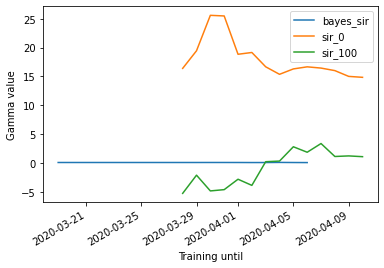

In [101]:
for model in params:
    params[model].gamma.plot(label = model)
plt.xlabel("Training until")
plt.ylabel("Gamma value")
plt.legend()
plt.show()

### Mortality

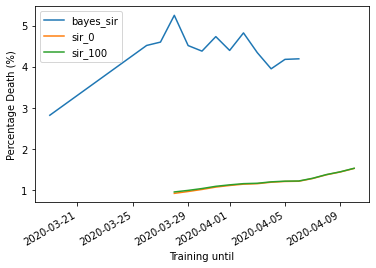

In [102]:
for model in params:
    (params[model].DeathProportion * 100).plot(label = model)
plt.xlabel("Training until")
plt.ylabel("Percentage Death (%)")
plt.legend()
plt.show()